# Laboratorium 3 — Wprowadzenie do wykorzystania logiki rozmytej

## Zadanie domowe

#### Jakub Szaredko

## Definicja problemu

Poniżej zaimplementowany zbiór reguł logiki rozmytej opisuje preferowaną prędkość dla górskiego entuzjasty. Zbiór akceptuje szlaki, które występują w łańcuchach górskich w całej Polsce. Jest przeznaczony przede wszystkim dla gór o niskiej i średniej wysokości, co za tym idzie o niestromym nachyleniu ($>\!50\%$).

System zawiera 3 zmienne wejściowe oraz 1 zmienną wejściową.

1. Zmienne wejściowe:
    - **Wiek** (`Age`) $[\text{lata}]$ — wiek turysty od $4$ do $150$ lat _(nie dyskryminujemy starszych, https://www.youtube.com/watch?v=PjdAzfDWeL4)_.
    - **Waga plecaka** (`BackpackWeight`) $[\text{kg}]$ — w kilogramach od $0$ do $20$, wykluczone zostały przypadki bardziej ekstremalne, np. nosicze.
    - **Nachylenie terenu** (`Grade`) $[\%]$ — skala procentowa od $-100$ do $100$, gdzie ujemne wartości oznaczają spadkowe nachylenie terenu.

2. Zmienna wyjściowa:
    - **Preferowana prędkość** (`Speed`) $[\frac{\text{min}}{1\text{km}}]$ — prędkość mierzona w liczbie minut na przebyty 1 kilometr.

## Implementacja

In [1]:
from simpful import FuzzySystem, TrapezoidFuzzySet, LinguisticVariable

FS = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful



### Zmienne językowe

#### Zmienne wejściowe

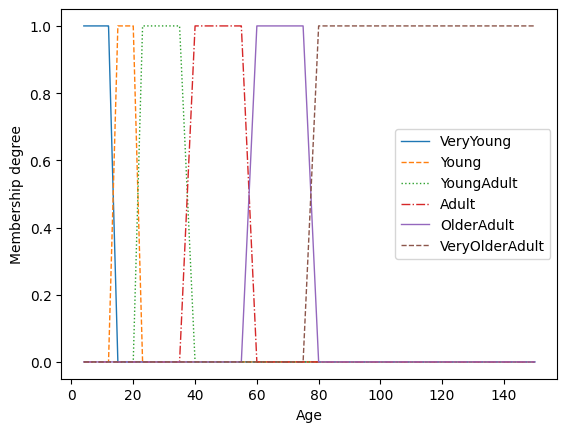

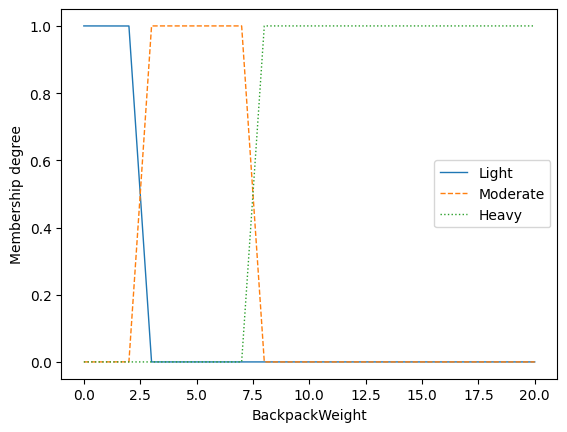

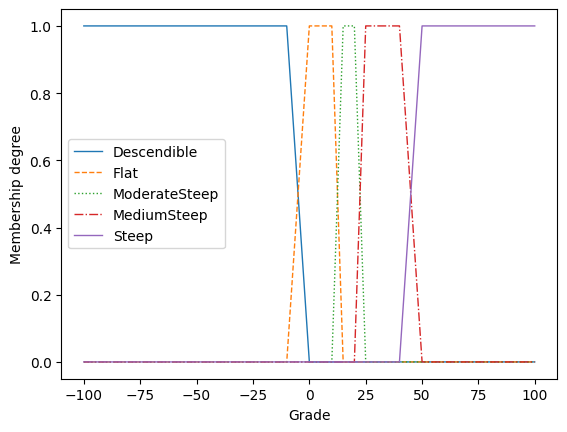

In [2]:
age = LinguisticVariable([
    TrapezoidFuzzySet(a=4, b=4, c=12, d=15, term="VeryYoung"),
    TrapezoidFuzzySet(a=12, b=15, c=20, d=23, term="Young"),
    TrapezoidFuzzySet(a=20, b=23, c=35, d=40, term="YoungAdult"),
    TrapezoidFuzzySet(a=35, b=40, c=55, d=60, term="Adult"),
    TrapezoidFuzzySet(a=55, b=60, c=75, d=80, term="OlderAdult"),
    TrapezoidFuzzySet(a=75, b=80, c=150, d=150, term="VeryOlderAdult"),
], universe_of_discourse=[4, 150])
FS.add_linguistic_variable("Age", age)
FS.plot_variable("Age")

backpack_weight = LinguisticVariable([
    TrapezoidFuzzySet(a=0, b=0, c=2, d=3, term="Light"),
    TrapezoidFuzzySet(a=2, b=3, c=7, d=8, term="Moderate"),
    TrapezoidFuzzySet(a=7, b=8, c=20, d=20, term="Heavy"),
], universe_of_discourse=[0, 20])
FS.add_linguistic_variable("BackpackWeight", backpack_weight)
FS.plot_variable("BackpackWeight")

grade = LinguisticVariable([
    TrapezoidFuzzySet(a=-100, b=-100, c=-10, d=0, term="Descendible"),
    TrapezoidFuzzySet(a=-10, b=0, c=10, d=15, term="Flat"),
    TrapezoidFuzzySet(a=10, b=15, c=20, d=25, term="ModerateSteep"),
    TrapezoidFuzzySet(a=20, b=25, c=40, d=50, term="MediumSteep"),
    TrapezoidFuzzySet(a=40, b=50, c=100, d=100, term="Steep"),
], universe_of_discourse=[-100, 100])
FS.add_linguistic_variable("Grade", grade)
FS.plot_variable("Grade")

#### Zmienna wyjściowa

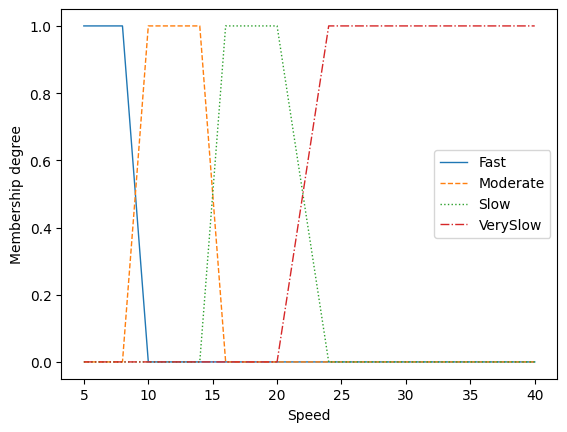

In [3]:
speed = LinguisticVariable([
    TrapezoidFuzzySet(a=5, b=5, c=8, d=10, term="Fast"),
    TrapezoidFuzzySet(a=8, b=10, c=14, d=16, term="Moderate"),
    TrapezoidFuzzySet(a=14, b=16, c=20, d=24, term="Slow"),
    TrapezoidFuzzySet(a=20, b=24, c=40, d=40, term="VerySlow"),
], universe_of_discourse=[5, 40])
FS.add_linguistic_variable("Speed", speed)
FS.plot_variable("Speed")

### Zbiór reguł

In [4]:
FS.add_rules([
    # Fast (5 - 9 min/km)
    "IF ((Age IS Young) OR (Age IS YoungAdult)) AND (BackpackWeight IS Light) AND (Grade IS Flat) THEN (Speed IS Fast)",
    "IF (Age IS Young) AND ((Grade IS Descendible) OR (Grade IS Flat)) AND (BackpackWeight IS Light) THEN (Speed IS Fast)",
    "IF (Age IS YoungAdult) AND (BackpackWeight IS Moderate) AND (Grade IS Descendible) THEN (Speed IS Fast)",

    # Moderate (9 - 15 min/km)
    "IF (Age IS VeryYoung) AND (BackpackWeight IS Light) AND (Grade IS Flat) THEN (Speed IS Moderate)",
    "IF (Age IS Adult) AND (BackpackWeight IS Light) AND (Grade IS Flat) THEN (Speed IS Moderate)",
    "IF ((Age IS Young) OR (Age IS YoungAdult)) AND (BackpackWeight IS Moderate) AND (Grade IS ModerateSteep) THEN (Speed IS Moderate)",
    "IF ((Age IS OlderAdult) OR (Age IS VeryOlderAdult)) AND (BackpackWeight IS Light) AND (Grade IS Descendible) THEN (Speed IS Moderate)",

    # Slow (15 - 22 min/km)
    "IF (Age IS YoungAdult) AND (BackpackWeight IS Heavy) AND (Grade IS ModerateSteep) THEN (Speed IS Slow)",
    "IF (Age IS OlderAdult) AND (BackpackWeight IS Moderate) AND (Grade IS Flat) THEN (Speed IS Slow)",
    "IF ((Age IS Adult) OR (Age IS OlderAdult)) AND (BackpackWeight IS Moderate) AND (Grade IS MediumSteep) THEN (Speed IS Slow)",
    "IF (Age IS VeryOlderAdult) AND (BackpackWeight IS Light) AND (Grade IS Flat) THEN (Speed IS Slow)",

    # Very slow (22+ min/km)
    "IF ((Age IS Adult) OR (Age IS OlderAdult)) AND (BackpackWeight IS Heavy) AND (Grade IS Steep) THEN (Speed IS VerySlow)",
    "IF (Age IS VeryOlderAdult) AND (BackpackWeight IS Moderate) AND (Grade IS ModerateSteep) THEN (Speed IS VerySlow)",
    "IF (Age IS VeryOlderAdult) AND (BackpackWeight IS Heavy) AND (Grade IS Flat) THEN (Speed IS VerySlow)",
    "IF (Age IS VeryOlderAdult) AND (BackpackWeight IS Heavy) AND (Grade IS Steep) THEN (Speed IS VerySlow)",

    # Fallback rule: if no other rule is fired, set to slow
    "IF (Grade IS Descendible) OR (Grade IS Flat) THEN (Speed IS Moderate)",
    "IF (Grade IS ModerateSteep) THEN (Speed IS Slow)",
    "IF (Grade IS MediumSteep) OR (Grade IS Steep) THEN (Speed IS VerySlow)",
])

### Przykładowe wywołanie

In [5]:
FS.set_variable("Age", 25)
FS.set_variable("BackpackWeight", 4)
FS.set_variable("Grade", 50)

speed = FS.inference()

In [6]:
speed

{'Speed': np.float64(30.971761924291993)}